In [1]:
#Import necessary libraries
import pandas as pd  #pandas for data manipulation and analysis
import numpy as np   #numpy for numerical operations
from pprint import PrettyPrinter  #pprint for pretty printing of data structures
from datetime import datetime, time  #datetime for working with dates and times
import matplotlib.pyplot as plt  #matplotlib for basic data visualization
import seaborn as sns  #seaborn for statistical data visualization
import plotly.express as px  #plotly express for interactive and expressive visualizations

In [2]:
#Read the employee survey data from a CSV file into a DataFrame
emp_survey = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\employee_survey_data.csv")
#Read the in-time data from a CSV file into a DataFrame
in_time = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\in_time.csv")
#Read the out-time data from a CSV file into a DataFrame
out_time = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\out_time.csv")
#Read the general employee data from a CSV file into a DataFrame
general = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\general_data.csv")
#Read the manager survey data from a CSV file into a DataFrame
manager_survey = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\manager_survey_data.csv")

## Data Preprocessing in every csv file

In [3]:
general.shape

(4410, 24)

In [4]:
general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
general.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### NumCompanies Worked & Total Working years have few null values

<Axes: ylabel='Frequency'>

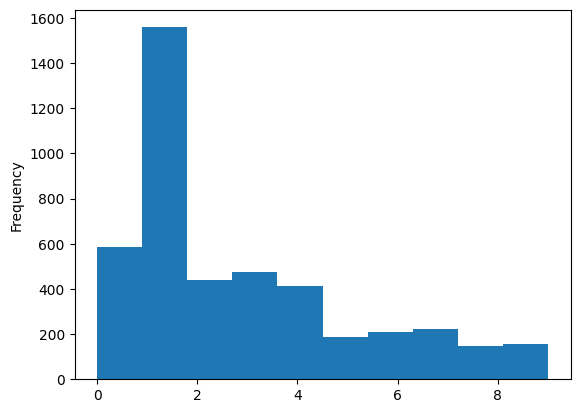

In [6]:
general["NumCompaniesWorked"].plot(kind="hist")

In [7]:
general["Mode"]=general["NumCompaniesWorked"].fillna(general["NumCompaniesWorked"].mode([0]))

In [8]:
general["Mode"]

0       1.0
1       0.0
2       1.0
3       3.0
4       4.0
       ... 
4405    3.0
4406    2.0
4407    0.0
4408    0.0
4409    0.0
Name: Mode, Length: 4410, dtype: float64

<Axes: ylabel='Frequency'>

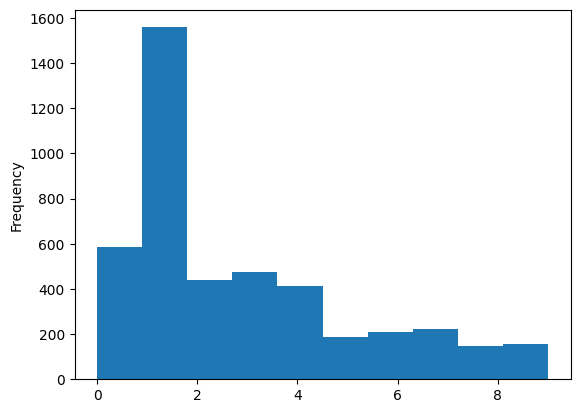

In [9]:
general["Mode"].plot(kind="hist")

In [10]:
general["NumCompaniesWorked"]=general["NumCompaniesWorked"].fillna(general["NumCompaniesWorked"].mode()[0])

In [11]:
general["TotalWorkingYears"].corr(general["YearsAtCompany"])

0.6277031466021694

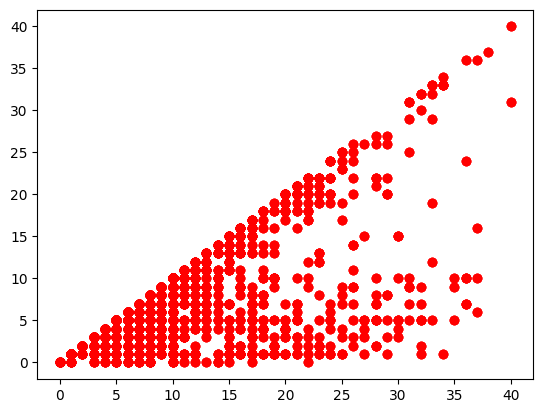

In [12]:
plt.scatter(general["TotalWorkingYears"],general["YearsAtCompany"] , label='Data Points', color='red', marker='o')

#### since years at company and total working years are correlated,imputing by grouped mean

In [13]:
general["TotalWorkingYears"]=general.groupby("YearsAtCompany")["TotalWorkingYears"].transform(lambda x:x.fillna(x.mean()))

In [14]:
general["TotalWorkingYears"]

0        1.000000
1        6.000000
2        5.000000
3       13.000000
4        9.000000
          ...    
4405    10.000000
4406    10.000000
4407     5.000000
4408    10.000000
4409    21.926829
Name: TotalWorkingYears, Length: 4410, dtype: float64

In [15]:
general=general.drop(columns=["Mode"])

In [16]:
general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.000000,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.000000,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.000000,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.000000,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.000000,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.000000,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.000000,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.000000,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.000000,2,9,7,8


In [17]:
general.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

#### Treating null in Manager Survey file

In [18]:
manager_survey

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [19]:
manager_survey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [20]:
manager_survey.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

#### No null values in Manager Survey

### Treating null in Employee Survey file

In [21]:
emp_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [22]:
emp_survey.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

<Axes: ylabel='Frequency'>

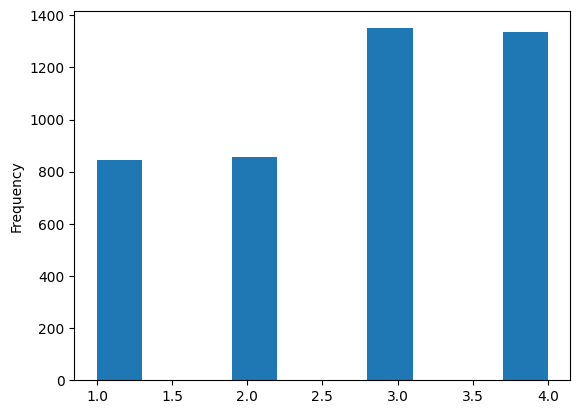

In [23]:
#EnvironmentSatisfaction
emp_survey["EnvironmentSatisfaction"].plot(kind="hist")

<Axes: ylabel='Frequency'>

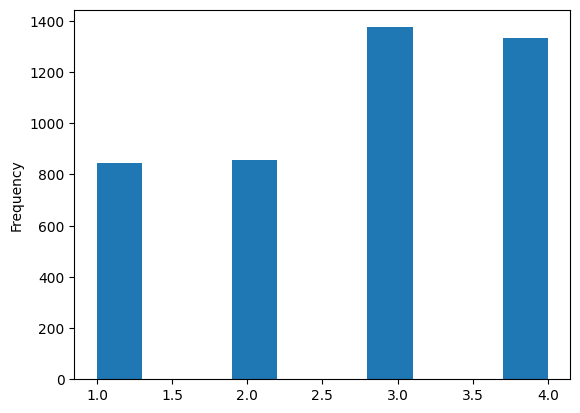

In [24]:
ESmedian=emp_survey["EnvironmentSatisfaction"].fillna(emp_survey["EnvironmentSatisfaction"].median())
ESmedian.plot(kind="hist")

In [25]:
ESmedian.isnull().sum()

0

In [26]:
emp_survey["EnvironmentSatisfaction"]=emp_survey["EnvironmentSatisfaction"].fillna(emp_survey["EnvironmentSatisfaction"].median())

In [27]:
emp_survey["EnvironmentSatisfaction"].isnull().sum()

0

<Axes: ylabel='Frequency'>

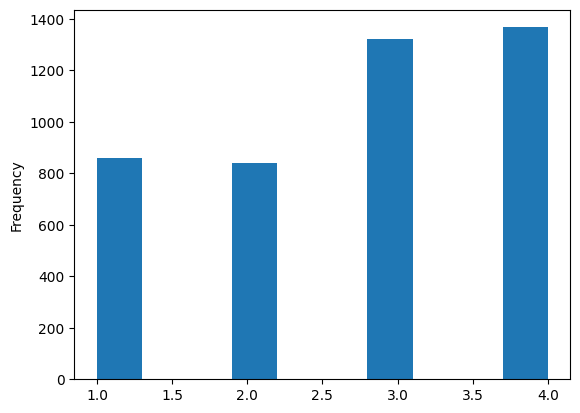

In [28]:
#JobSatisfaction
emp_survey["JobSatisfaction"].plot(kind="hist")

<Axes: ylabel='Frequency'>

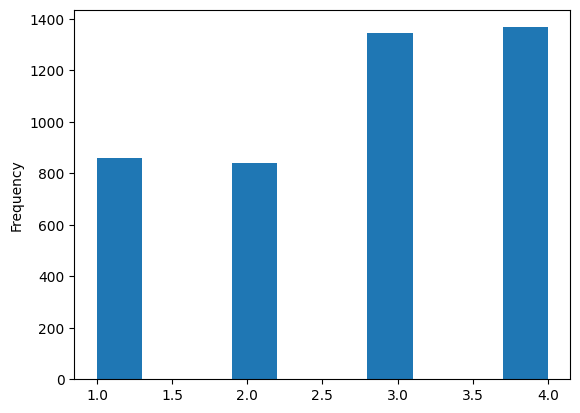

In [29]:
jsmedian=emp_survey["JobSatisfaction"].fillna(emp_survey["JobSatisfaction"].median())
jsmedian.plot(kind="hist")

In [30]:
emp_survey["JobSatisfaction"]=emp_survey["JobSatisfaction"].fillna(emp_survey["JobSatisfaction"].median())

In [31]:
emp_survey["JobSatisfaction"].isnull().sum()

0

<Axes: ylabel='Frequency'>

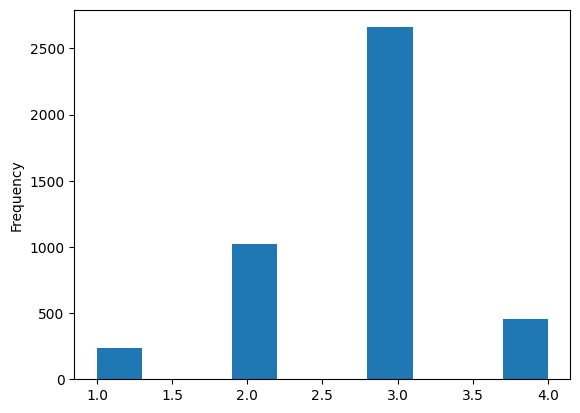

In [32]:
#worklifebalance
emp_survey["WorkLifeBalance"].plot(kind="hist")

<Axes: ylabel='Frequency'>

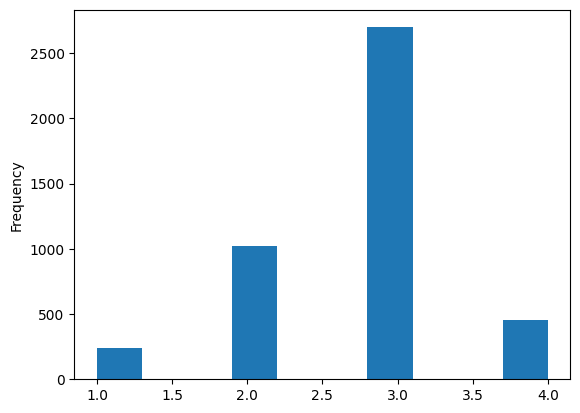

In [33]:
wlbmedian=emp_survey["WorkLifeBalance"].fillna(emp_survey["WorkLifeBalance"].median())
wlbmedian.plot(kind="hist")

In [34]:
emp_survey["WorkLifeBalance"]=emp_survey["WorkLifeBalance"].fillna(emp_survey["WorkLifeBalance"].median())

In [35]:
emp_survey["WorkLifeBalance"].isnull().sum()

0

In [36]:
emp_survey.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [37]:
merged_df = pd.merge(manager_survey, emp_survey, on='EmployeeID', how='inner')

In [38]:
merged_df

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3,3,3.0,4.0,2.0
1,2,2,4,3.0,2.0,4.0
2,3,3,3,2.0,2.0,1.0
3,4,2,3,4.0,4.0,3.0
4,5,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...
4405,4406,3,3,4.0,1.0,3.0
4406,4407,2,3,4.0,4.0,3.0
4407,4408,3,4,1.0,3.0,3.0
4408,4409,2,3,4.0,1.0,3.0


In [39]:
final = pd.merge(general,merged_df , on='EmployeeID', how='inner')

In [40]:
final

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.000000,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.000000,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.000000,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.000000,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.000000,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.000000,5,3,0,2,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.000000,2,3,0,2,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.000000,4,4,1,2,3,4,1.0,3.0,3.0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10.000000,2,9,7,8,2,3,4.0,1.0,3.0


In [41]:
final.to_csv('dfGME.csv')

In [42]:
in_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [43]:
out_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [44]:
in_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)
out_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)

In [45]:
drop_col = list(out_time.select_dtypes(include='float').columns)#Null values are in float datatypes here holidays columns
drop_col.append('EmployeeID')
columns_list = list(in_time.drop(columns=drop_col).columns)

In [46]:
columns_list

['2015-01-02',
 '2015-01-05',
 '2015-01-06',
 '2015-01-07',
 '2015-01-08',
 '2015-01-09',
 '2015-01-12',
 '2015-01-13',
 '2015-01-15',
 '2015-01-16',
 '2015-01-19',
 '2015-01-20',
 '2015-01-21',
 '2015-01-22',
 '2015-01-23',
 '2015-01-27',
 '2015-01-28',
 '2015-01-29',
 '2015-01-30',
 '2015-02-02',
 '2015-02-03',
 '2015-02-04',
 '2015-02-05',
 '2015-02-06',
 '2015-02-09',
 '2015-02-10',
 '2015-02-11',
 '2015-02-12',
 '2015-02-13',
 '2015-02-16',
 '2015-02-17',
 '2015-02-18',
 '2015-02-19',
 '2015-02-20',
 '2015-02-23',
 '2015-02-24',
 '2015-02-25',
 '2015-02-26',
 '2015-02-27',
 '2015-03-02',
 '2015-03-03',
 '2015-03-04',
 '2015-03-06',
 '2015-03-09',
 '2015-03-10',
 '2015-03-11',
 '2015-03-12',
 '2015-03-13',
 '2015-03-16',
 '2015-03-17',
 '2015-03-18',
 '2015-03-19',
 '2015-03-20',
 '2015-03-23',
 '2015-03-24',
 '2015-03-25',
 '2015-03-26',
 '2015-03-27',
 '2015-03-30',
 '2015-03-31',
 '2015-04-01',
 '2015-04-02',
 '2015-04-03',
 '2015-04-06',
 '2015-04-07',
 '2015-04-08',
 '2015-04-

In [47]:
def avg_working_time(in_time,out_time,columns_list):
    
    #Create a list to store each calculated column
    calculated_columns = []
    for i in columns_list:
        in_date = pd.to_datetime(in_time[i])
        out_date = pd.to_datetime(out_time[i])
    
        #Calculate the time difference and store it in the list
        calculated_columns.append(out_date - in_date)
    
    # Concatenate the list of columns to the result_df
    result_df = pd.concat(calculated_columns, axis=1, keys=columns_list)
    result_df['Avg_Working_time']=result_df[columns_list].mean(axis=1)
    return result_df['Avg_Working_time']

In [48]:
final=pd.read_csv(r"dfGME.csv")

In [49]:
final['Avg_Working_time'] = avg_working_time(in_time, out_time, columns_list)

In [50]:
final

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Avg_Working_time
0,0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,...,6,1,0,0,3,3,3.0,4.0,2.0,0 days 07:22:25.142241379
1,1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,...,3,5,1,4,2,4,3.0,2.0,4.0,0 days 07:43:08.288135593
2,2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,...,2,5,0,3,3,3,2.0,2.0,1.0,0 days 07:00:47.665289256
3,3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,...,5,8,7,5,2,3,4.0,4.0,3.0,0 days 07:11:37.242553191
4,4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,...,2,6,0,4,3,3,4.0,1.0,3.0,0 days 08:00:22.228571428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,...,5,3,0,2,3,3,4.0,1.0,3.0,0 days 08:31:20.197530864
4406,4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,...,2,3,0,2,2,3,4.0,4.0,3.0,0 days 06:05:34.634854771
4407,4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,...,4,4,1,2,3,4,1.0,3.0,3.0,0 days 07:42:23.874458874
4408,4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,...,2,9,7,8,2,3,4.0,1.0,3.0,0 days 09:29:33.340248962


In [51]:
final["Avg_Working_time"]

0      0 days 07:22:25.142241379
1      0 days 07:43:08.288135593
2      0 days 07:00:47.665289256
3      0 days 07:11:37.242553191
4      0 days 08:00:22.228571428
                  ...           
4405   0 days 08:31:20.197530864
4406   0 days 06:05:34.634854771
4407   0 days 07:42:23.874458874
4408   0 days 09:29:33.340248962
4409   0 days 06:59:20.211206896
Name: Avg_Working_time, Length: 4410, dtype: timedelta64[ns]

In [52]:
# Convert timedelta to float representation in hours
final['Avg_Working_time'] = final['Avg_Working_time'].dt.total_seconds() / 3600.0

In [53]:
final.drop(columns=["Unnamed: 0"],inplace=True)

In [54]:
final.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Avg_Working_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,8.006175


In [55]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [56]:
final.to_csv("final_data_Employee_Attrition.csv")

In [57]:
final.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance     

In [21]:
import pandas as pd
Employee_Attrition = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\EA_Raw_data.csv")

In [10]:
import mysql.connector as sql
import pymysql 
from sqlalchemy import create_engine

In [11]:
# CONNECTING WITH MYSQL DATABASE
user="root"
password="1234"
host="127.0.0.1"
database= "project-employeeattrition"
port = "3306"

In [12]:
engine = create_engine("mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(user, password, host, port, database))

In [13]:
con = engine.connect()

In [15]:
Employee_Attrition.to_sql("employee_attrition_data",con=engine, if_exists='replace', index=False)

4410

In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\SANTHOSH RAJENDRAN\Desktop\GUVI Python\Projects-GUVI\Project-EmployeeAttrition\EA_Raw_data.csv")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Avg_Working_time,Years_At_Company_Bin,Percent_Salary_Hike_Bin,Years_With_Current_Manager_Bin
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,0,3,3,3,4,2,7.373651,0-1 years,10-15 % Salary Hike,Less than Year
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,4,2,4,3,2,4,7.718969,2-5 years,20-25 % Salary Hike,2-5 years
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,3,3,3,2,2,1,7.013240,2-5 years,10-15 % Salary Hike,2-5 years
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,2,3,4,4,3,7.193678,5-10 years,10-15 % Salary Hike,2-5 years
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4,3,3,4,1,3,8.006175,5-10 years,10-15 % Salary Hike,2-5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,2,3,3,4,1,3,8.522277,2-5 years,15-20 % Salary Hike,2-5 years
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,2,3,4,4,3,6.092954,2-5 years,10-15 % Salary Hike,2-5 years
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,2,3,4,1,3,3,7.706632,2-5 years,15-20 % Salary Hike,2-5 years
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,8,2,3,4,1,3,9.492595,5-10 years,10-15 % Salary Hike,5-10 years


In [4]:
df.drop(columns=['EmployeeCount','EmployeeID','Years_At_Company_Bin','Percent_Salary_Hike_Bin','Years_With_Current_Manager_Bin','StandardHours'],inplace=True)

In [24]:
df['Avg_Working_time'].describe()

count    4410.000000
mean        7.700792
std         1.340218
min         5.950504
25%         6.673333
50%         7.406761
75%         8.368703
max        11.030960
Name: Avg_Working_time, dtype: float64